In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pandas

In [206]:
# Convert the list of 26 letters of the alphabet to the index of the Dataframe,
#    and assign 26 random integer numbers. Print out the first 5 rows
df = pd.DataFrame(
    np.random.randint(1, 26, size=26),
    index=[chr(i) for i in range(ord('a'),ord('z')+1)])
df

,0
a,19
b,12
c,23
d,20
e,25
f,3
g,5
h,19
i,7
j,21


In [205]:
# Construct the following DataFrame and print it out.
# Use "iloc" to convert the first column of this DataFrame as a Series

df = pd.DataFrame({
    'col1': [1, 2, 3, 4, 7 ,11],
    'col2': [4, 5, 6, 9, 5, 0],
    'col3': [7, 5, 8, 12, 1, 11]
})

series = df.iloc[:, 0]
print(series)
print(type(series))

0     1
1     2
2     3
3     4
4     7
5    11
Name: col1, dtype: int64
<class 'pandas.core.series.Series'>


In [12]:
# Work on the above data (question 2), implement the following tasks using indexers loc and/or iloc
print("(1) Select all columns, except one given column 'col3', and print out the result.")
print(df.loc[:, df.columns != 'col3'])
print()
print("(2) Remove first 3 rows of the DataFrame and print it out.")
print(df.iloc[3:])
print()
print("(3) Remove last 3 rows of the DataFrame and print it out.")
print(df.iloc[:3])

(1) Select all columns, except one given column 'col3', and print out the result.
   col1  col2
0     1     4
1     2     5
2     3     6
3     4     9
4     7     5
5    11     0

(2) Remove first 3 rows of the DataFrame and print it out.
   col1  col2  col3
3     4     9    12
4     7     5     1
5    11     0    11

(3) Remove last 3 rows of the DataFrame and print it out.
   col1  col2  col3
0     1     4     7
1     2     5     5
2     3     6     8


In [14]:
# Two series:

ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

print("(1) From ser1 remove items present in ser2.")
ser2.drop(ser2[ser2.isin(ser1)].index, inplace=True)
print(ser2)
print()

print("(2) Get all items of ser1 and ser2 not common to both.")
union = pd.Series(np.union1d(ser1, ser2))
intersection = pd.Series(np.intersect1d(ser1, ser2))

print(union[~union.isin(intersection)])

(1) From ser1 remove items present in ser2.
2    6
3    7
4    8
dtype: int64

(2) Get all items of ser1 and ser2 not common to both.
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
dtype: int64


In [16]:
# Compute the Euclidean distance between two series (points) p1 and p2:
#      .
# Ref: https://en.wikipedia.org/wiki/Euclidean_distance (Links to an external site.)

p1 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
p2 = pd.Series([8, 9, 10, 11, 12, 7, 6, 5, 4, 3])

print("(1) using a calculation formula ref the link;")
dist = np.sqrt(np.sum([(a - b) * (a - b) for a, b in zip(p1, p2)]))
print(dist)
print()

print("(2) using a built-in function")
dist = np.linalg.norm(p1 - p2)
print(dist)


(1) using a calculation formula ref the link;
18.16590212458495

(2) using a built-in function
18.16590212458495


In [189]:
# Create a new column such that,
# each row contains the row number of the farthest row-record by Euclidean distance.

# Desired Output for Column:  (Values in "dist" can be integer or floating point number)
#             p          q          r           s           nearest_row    dist
# a          52        93        15        72        d                      117
# b          61        21        83        87        d                      107
# c          75        75        88        24        d                      98
# d          3          22        53        2          g                      123
# e          88        30        38        2          a                      103
# f           64        60        21        33        b                      91
# g          76        58        22        89        d                      123
# h          49        91        59        42        d                      92
# i           92        60        80        15        a (or d)           101
# j           62        62        47        62        d                      93

np.random.seed(42)
df = pd.DataFrame(
    np.random.randint(1,100, 40).reshape(10, -1),
    columns=list('pqrs'),
    index=list('abcdefghij')
)


nearest_row = []
dist = []

for i, row in df.iterrows():
    cr = row
    remains = df.drop(i)

    md, nr = -float('inf'), None
    
    for j, dr in remains.iterrows():
        d = round(np.linalg.norm(cr.values - dr.values))
        if d > md:
            md = d
            nr = j
    if nr:
        nearest_row.append(nr)
        dist.append(md)

df['nearest_row'] = nearest_row
df['dist'] = dist
print(df)

    p   q   r   s nearest_row  dist
a  52  93  15  72           d   117
b  61  21  83  87           d   107
c  75  75  88  24           d    98
d   3  22  53   2           g   123
e  88  30  38   2           a   103
f  64  60  21  33           b    91
g  76  58  22  89           d   123
h  49  91  59  42           d    92
i  92  60  80  15           a   101
j  62  62  47  62           d    93


In [203]:
# Create a dataframe with rows as strides from a given series:
#     L = pd.Series(range(15))

# Desired Output:
# array([[ 0,  1,  2,  3],
#        [ 2,  3,  4,  5],
#        [ 4,  5,  6,  7],
#        [ 6,  7,  8,  9],
#        [ 8,  9, 10, 11],
#        [10, 11, 12, 13]])

L = pd.Series(range(15))

rn = int((len(L) - 4) / 2) + 1
print(
    np.array(
        [L[x: (x + 4)] for x in np.arange(0, len(L), 2)[: rn]])
)

[[ 0  1  2  3]
 [ 2  3  4  5]
 [ 4  5  6  7]
 [ 6  7  8  9]
 [ 8  9 10 11]
 [10 11 12 13]]


In [45]:
# In df,


df = pd.DataFrame(np.arange(20).reshape(-1, 5), columns=list('abcde'))
print(df)
print()

columns = list(df.columns)
columns[0], columns[2] = columns[2], columns[0]
df = df[columns]

print("(1) interchange columns 'a' and 'c';")
print(df)
print()

print("(2) Create a generic function to interchange two columns [without hardcoding column names];")
def interchange_col(df, col1, col2):
    """
        col1 = string/int
        col2 = string/int
    """
    columns = df.columns
    col1i = columns.get_loc(col1)
    col2i = columns.get_loc(col2)
    
    columns_list = list(columns)
    columns_list[col1i], columns_list[col2i] = columns_list[col2i], columns_list[col1i]
    
    df = df[columns_list]
    return df

df = interchange_col(df, 'b', 'c')
print(df)
print()

print("(3) Sort the columns in reverse alphabetical order, that is colume 'e' first through column 'a' last")
df.sort_index(axis=1, ascending=False, inplace=True)
print(df)

    a   b   c   d   e
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19

(1) interchange columns 'a' and 'c';
    c   b   a   d   e
0   2   1   0   3   4
1   7   6   5   8   9
2  12  11  10  13  14
3  17  16  15  18  19

(2) Create a generic function to interchange two columns [without hardcoding column names];
    b   c   a   d   e
0   1   2   0   3   4
1   6   7   5   8   9
2  11  12  10  13  14
3  16  17  15  18  19

(3) Sort the columns in reverse alphabetical order, that is colume 'e' first through column 'a' last
    e   d   c   b   a
0   4   3   2   1   0
1   9   8   7   6   5
2  14  13  12  11  10
3  19  18  17  16  15


In [48]:
# Import every 50th row of BostonHousing dataset as a dataframe.

chunks = pd.read_csv("BostonHousing.csv", chunksize=50)
df = pd.DataFrame()
for chunk in chunks:
    df = df.append(chunk.iloc[0,:])
df

,age,b,chas,crim,dis,indus,lstat,medv,nox,ptratio,rad,rm,tax,zn
0,65.2,396.90,0.0,0.00632,4.0900,2.31,4.98,24.0,0.538,15.3,1.0,6.575,296.0,18.0
50,45.7,395.56,0.0,0.08873,6.8147,5.64,13.45,19.7,0.439,16.8,4.0,5.963,243.0,21.0
100,79.9,394.76,0.0,0.14866,2.7778,8.56,9.42,27.5,0.520,20.9,5.0,6.727,384.0,0.0
150,97.3,372.80,0.0,1.65660,1.6180,19.58,14.10,21.5,0.871,14.7,5.0,6.122,403.0,0.0
200,13.9,384.30,0.0,0.01778,7.6534,1.47,4.45,32.9,0.403,17.0,3.0,7.135,402.0,95.0
250,13.0,396.28,0.0,0.14030,7.3967,5.86,5.90,24.4,0.431,19.1,7.0,6.487,330.0,22.0
300,47.4,390.86,0.0,0.04417,7.8278,2.24,6.07,24.8,0.400,14.8,5.0,6.871,358.0,70.0
350,44.4,396.90,0.0,0.06211,8.7921,1.25,5.98,22.9,0.429,19.7,1.0,6.490,335.0,40.0
400,100.0,396.90,0.0,25.04610,1.5888,18.10,26.77,5.6,0.693,20.2,24.0,5.987,666.0,0.0
450,92.6,0.32,0.0,6.71772,2.3236,18.10,17.44,13.4,0.713,20.2,24.0,6.749,666.0,0.0


In [56]:
# Import the boston housing dataset,
# but while importing change the 'medv' (median house value)
# column so that values < 25 becomes ‘Low’ and > 25 becomes ‘High’.

df = pd.read_csv("BostonHousing.csv")

df['medv'] = df['medv'].apply(lambda r: 'Low' if r < 25 else 'High')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,Low
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,Low
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,High
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,High
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,Low
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,Low
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,Low
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,Low


In [58]:
# Create a TimeSeries starting ‘2021-01-01’
# and 10 weekends (Saturdays) after that having random numbers as values. 

df = pd.DataFrame(
    {'values': np.random.randint(0, 10, size=10)},
    index=pd.date_range(start='2021-01-01', periods=10, freq='W-SAT')
)

df

,values
2021-01-02,6
2021-01-09,1
2021-01-16,3
2021-01-23,8
2021-01-30,1
2021-02-06,9
2021-02-13,8
2021-02-20,9
2021-02-27,4
2021-03-06,1


In [66]:
# A Pandas series has missing dates and values.
# Make all missing dates appear and fill up with value from previous date.

# 2021-01-01     1.0
# 2021-01-03    10.0
# 2021-01-06     3.0
# 2021-01-08     NaN

# Desired Output:
# 2021-01-01     1.0
# 2021-01-02     1.0
# 2021-01-03    10.0
# 2021-01-04    10.0
# 2021-01-05    10.0
# 2021-01-06     3.0
# 2021-01-07     3.0
# 2021-01-08     NaN

import io
data = """value          
"2021-01-01"     1.0
"2021-01-03"    10.0
"2021-01-06"     3.0
"2021-01-08"     NaN"""

df = pd.read_table(
    io.StringIO(data),
    delim_whitespace=True
)

print(df)
print()

df.index = pd.to_datetime(df.index)
df = df.resample('D').ffill().reset_index()
print(df)

            value
2021-01-01    1.0
2021-01-03   10.0
2021-01-06    3.0
2021-01-08    NaN

       index  value
0 2021-01-01    1.0
1 2021-01-02    1.0
2 2021-01-03   10.0
3 2021-01-04   10.0
4 2021-01-05   10.0
5 2021-01-06    3.0
6 2021-01-07    3.0
7 2021-01-08    NaN


In [81]:
np.random.seed(100)
df = pd.DataFrame(
    {
        'fruit': ['apple', 'banana', 'orange'] * 3,
        'taste': np.random.rand(9),
        'price': np.random.randint(1, 15, 9)
    })

print(df)
print()
print("(1) find the second largest value of 'taste' for 'banana' (Hint: you can use groupby);")
g = df['taste'].groupby(df.fruit)
print(g.get_group('banana').sort_values().iloc[-2])
print()
print("(2) compute the mean price of every fruit, while keeping the fruit as another column instead of an index")
print(df.groupby('fruit', as_index=False)['price'].mean())

    fruit     taste  price
0   apple  0.543405      9
1  banana  0.278369      5
2  orange  0.424518     12
3   apple  0.844776     13
4  banana  0.004719     11
5  orange  0.121569      1
6   apple  0.670749     12
7  banana  0.825853     10
8  orange  0.136707     14

(1) find the second largest value of 'taste' for 'banana' (Hint: you can use groupby);
0.27836938509379616

(2) compute the mean price of every fruit, while keeping the fruit as another column instead of an index
    fruit      price
0   apple  11.333333
1  banana   8.666667
2  orange   9.000000


In [98]:
# Create a new column 'penultimate' which has the second largest value of each row of df.

np.random.seed(1)
df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1))

df['penultimate'] = df.apply(lambda r: r.sort_values().unique()[-2], axis=1)
print(df)

    0   1   2   3   4   5   6   7   8   9  penultimate
0  38  13  73  10  76   6  80  65  17   2           76
1  77  72   7  26  51  21  19  85  12  29           77
2  30  15  51  69  88  88  95  97  87  14           95
3  10   8  64  62  23  58   2   1  61  82           64
4   9  89  14  48  73  31  72   4  71  22           73
5  50  58   4  69  25  44  77  27  53  81           77
6  42  83  16  65  69  26  99  88   8  27           88
7  26  23  10  68  24  28  38  58  84  39           68


In [100]:
# Use Pandas ufuncs to normalize all columns in a dataframe.
# Keep the result within two decimal places.
# Use the df in q14, 

# Note: Don’t use external packages like sklearn, otherwise no credit.

print(df)
print("(1) Normalize all columns of df by subtracting the column mean and divide by standard deviation.")
print(df.apply(
    lambda c:
        round((c - c.mean()) / c.std(), 2)))
print("(2) Range all columns of df such that the minimum value in each column is 0 and max is 1.")
print(df.apply(
    lambda c:
        round((c.max() - c) / (c.max() - c.min()), 2)))


    0   1   2   3   4   5   6   7   8   9  penultimate
0  38  13  73  10  76   6  80  65  17   2           76
1  77  72   7  26  51  21  19  85  12  29           77
2  30  15  51  69  88  88  95  97  87  14           95
3  10   8  64  62  23  58   2   1  61  82           64
4   9  89  14  48  73  31  72   4  71  22           73
5  50  58   4  69  25  44  77  27  53  81           77
6  42  83  16  65  69  26  99  88   8  27           88
7  26  23  10  68  24  28  38  58  84  39           68
(1) Normalize all columns of df by subtracting the column mean and divide by standard deviation.
      0     1     2     3     4     5     6     7     8     9  penultimate
0  0.12 -0.95  1.54 -1.87  0.84 -1.25  0.55  0.31 -0.99 -1.18        -0.12
1  1.88  0.79 -0.82 -1.16 -0.10 -0.66 -1.14  0.84 -1.14 -0.27        -0.02
2 -0.24 -0.89  0.75  0.75  1.29  1.97  0.96  1.15  1.17 -0.78         1.76
3 -1.14 -1.09  1.22  0.44 -1.15  0.80 -1.61 -1.37  0.37  1.52        -1.31
4 -1.18  1.29 -0.57 -0.18  0.73 -

# Matplotlib

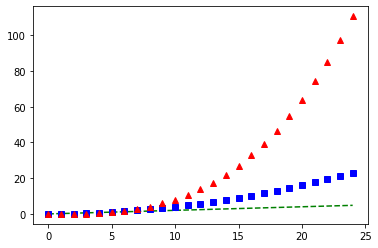

In [109]:
# Plot several lines with different format styles in one command using arrays.
# Sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)
# green dashes, blue squares and red triangles to plot t, t**2, t**3.
plt.plot(t, 'g--')
plt.plot(t**2, 'bs')
plt.plot(t**3, 'r^')
plt.show()

(1) Set the x and y axes labels as 'x' and 'y';
(2) Plot lines and/or markers to the Axes: blue, red; dotted, dashed;
(3) Set a title: "Plot with two or more lines with different styles";
(4) Show a legend on the plot as 'line1-dotted', 'line2-dashed'.


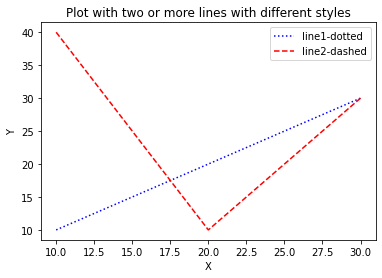

In [132]:
# Plot line1 and line2 with different styles:

# line 1
x1 = [10,20,30]
y1 = [20,40,10]

# line 2
x2 = [10,20,30]
y2 = [40,10,30]

print("(1) Set the x and y axes labels as 'x' and 'y';")
print("(2) Plot lines and/or markers to the Axes: blue, red; dotted, dashed;")
print('(3) Set a title: "Plot with two or more lines with different styles";')
print("(4) Show a legend on the plot as 'line1-dotted', 'line2-dashed'.")

plt.plot(x1, x2, 'b:', x2, y2, 'r--')
plt.legend(['line1-dotted', 'line2-dashed'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot with two or more lines with different styles')
plt.show()

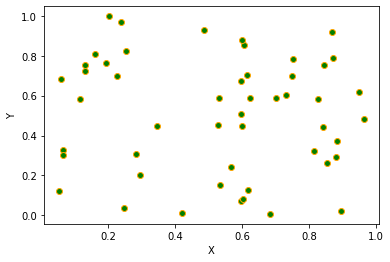

In [143]:
# Draw a scatter plot with empty circles taking a 50-point random distribution in X and Y;
# set X and Y as x- and y- axes lables; any color for face and edge, and plotted against each other.

x = np.random.rand(50)
y = np.random.rand(50)

plt.scatter(x, y, facecolors='green', edgecolors='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

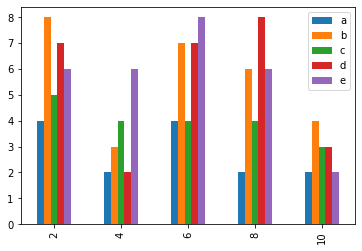

In [152]:
# Create the following bar plot from the DataFrame.

# Input DataFrame:

data = """a b c d e
2 4 8 5 7 6
4 2 3 4 2 6
6 4 7 4 7 8
8 2 6 4 8 6
10 2 4 3 3 2"""

df = pd.read_table(
    io.StringIO(data),
    delim_whitespace=True
)

df.plot.bar()
plt.show()

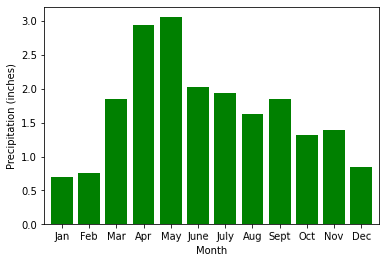

In [172]:
# The following dataset for average monthly precipitation.

data = """Month    Precipitation(inches)
Jan      0.70
Feb      0.75
Mar      1.85
Apr      2.93
May      3.05
June     2.02
July     1.93
Aug      1.62
Sept     1.84
Oct      1.31
Nov      1.39
Dec      0.84"""

df = pd.read_table(
    io.StringIO(data),
    delim_whitespace=True
)

df.plot.bar(
    x='Month',
    y='Precipitation(inches)',
    rot=1,
    color='g',
    width=0.8,
    legend=None, ylabel="Precipitation (inches)")
plt.show()